In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

### Ex. 1

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Ex. 2

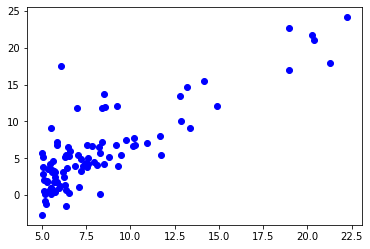

In [5]:
plt.plot(data['Population'], data['Profit'], 'o', color='blue');

#### Profit seems to be strongly dependant on population of a city. The bigger is the city the bigger is a the profit. However we can observe some exceptions in cases where the city is small 

### Ex. 3, 4, 5

In [6]:
data.insert(0, "Ones", [1]*len(data))

In [7]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
X = data.loc[:,['Ones','Population']]
Y = data['Profit']

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
Y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [91]:
Xm = np.matrix(X.values)
ym = np.matrix(Y.values)
theta = np.matrix(np.array([0.0,0.0], dtype=float))

### Ex. 6, 7

In [26]:
def computeCost(X, y, theta):
    Xt = np.transpose(X);
    newY = theta*Xt
    return (1/(2*len(X)))*np.sum(np.power(newY - y, 2))    

In [27]:
(computeCost(Xm, ym, theta))

32.072733877455676

### Ex. 8

In [186]:
def simple_grad(X, y, theta, alpha, it):
    cost = np.zeros(it,dtype=float)
    for i in range(it):        
        Xt = np.transpose(X);
        newY = theta*Xt
        theta[0,0] = theta[0,0] - (alpha/len(X))*np.sum(newY - y)
        for j in range(1, theta.shape[1]):
            theta[0,j] = theta[0,j] - (alpha/len(X))*np.sum(np.multiply(newY - y, Xt[j,:]))   
        cost[i] = computeCost(X, y, theta) 
    return theta, cost
    return range(1, theta.shape[1])
    #return theta.shape

In [182]:
simple_grad(Xm, ym, theta, alpha, it)

(1, 2)

In [183]:
for k in range(1,2):
    print(k)

1


In [184]:
simple_grad(Xm2, ym2, theta2, alpha, it)

(1, 3)

In [185]:
for k in range(1,3):
    print(k)

1
2


In [187]:
alpha = 0.01
it = 1000
theta = np.matrix(np.array([0.0,0.0], dtype=float))

### Ex. 9, 10, 11, 12

In [188]:
optimal_theta, costs = simple_grad(Xm, ym, theta, alpha, it)
print("Optimal theta: ", optimal_theta)

Optimal theta:  [[-3.24140214  1.1272942 ]]


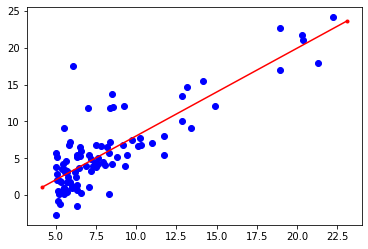

In [85]:
plt.plot(data['Population'], data['Profit'], 'o', color='blue');
intercept = optimal_theta[0,0]
slope = optimal_theta[0,1]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r.-')

Text(0, 0.5, 'cost after the iteration')

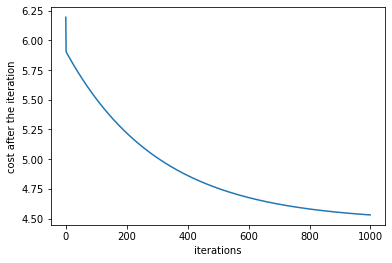

In [97]:
plt.plot(range(len(costs)), costs)
plt.xlabel("iterations")
plt.ylabel("cost after the iteration")

## Linear regression with multiple variables

In [156]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.mean()

Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64

In [157]:
data2_std = data2.std()
data2_mean = data2.mean()
data2 = (data2 - data2_mean)/data2_std

#### Data after feature normalization:

In [158]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [159]:
data2.insert(0, "Ones", [1]*len(data2))

In [160]:
X2 = data2.loc[:,['Ones','Size','Bedrooms']]
Y2 = data2['Price']

In [161]:
Xm2 = np.matrix(X2.values)
ym2 = np.matrix(Y2.values)
theta2 = np.matrix(np.array([0.0,0.0,0.0], dtype=float))

In [189]:
alpha = 0.01
it = 1000

In [192]:
optimal_theta2, costs2 = simple_grad(Xm2, ym2, theta2, alpha, it)
print("Optimal theta: ", optimal_theta2)

Optimal theta:  [[-1.11057735e-16  8.84765988e-01 -5.31788197e-02]]


Text(0, 0.5, 'Price')

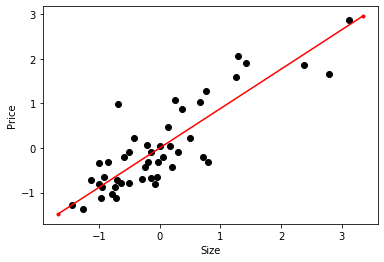

In [195]:
plt.plot(data2['Size'], data2['Price'], 'o', color='black');
intercept = optimal_theta2[0,0]
slope = optimal_theta2[0,1]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r.-')
plt.xlabel("Size")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

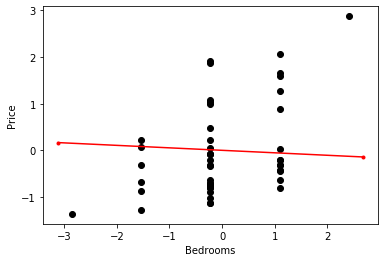

In [196]:
plt.plot(data2['Bedrooms'], data2['Price'], 'o', color='black');
intercept = optimal_theta2[0,0]
slope = optimal_theta2[0,2]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r.-')
plt.xlabel("Bedrooms")
plt.ylabel("Price")

## Linear regression - Python

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
#print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

In [13]:
print(0.7*506)

354.2


In [18]:
X_train = boston_X[:354,:]
Y_train = boston_Y[:354]
X_test = boston_X[354:,:]
Y_test = boston_Y[354:]

In [19]:
# Stworzenie obiektu 
regr = linm.LinearRegression()
 
# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, Y_train)
# Przewidywanie wartości dla danych testowych
Y_predicted = regr.predict(X_test)
 
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)
 
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [ 1.29693856  0.01469497  0.04050457  0.79060732 -9.12933243  9.24839787
 -0.0451214  -0.91395374  0.14079658 -0.01477291 -0.63369567  0.01577172
 -0.09514128]
Residual sum of squares: 546.9193565310729


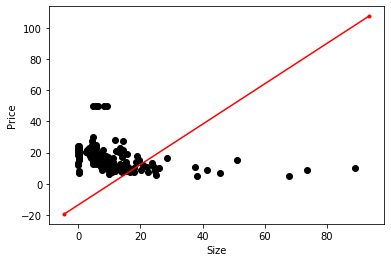

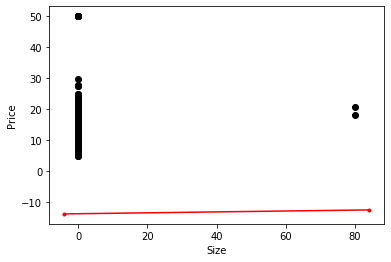

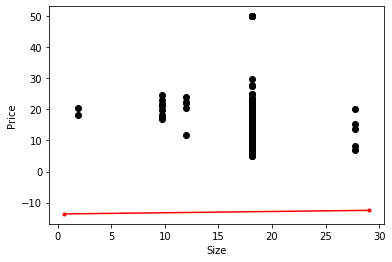

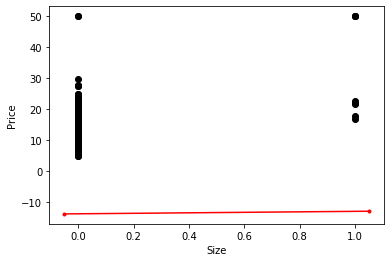

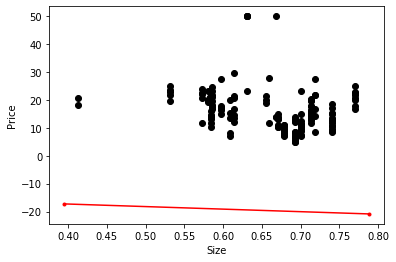

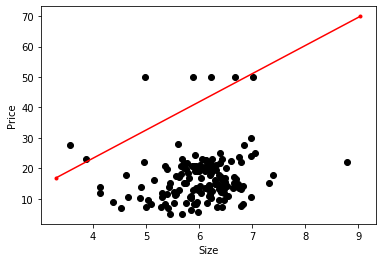

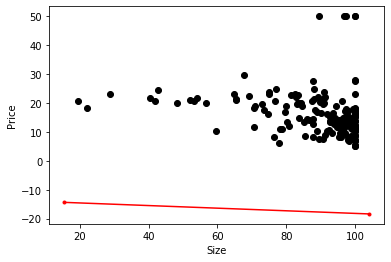

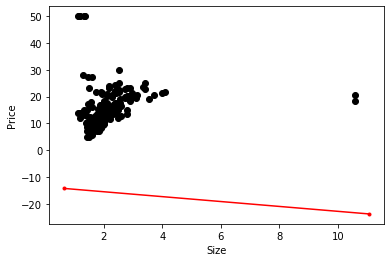

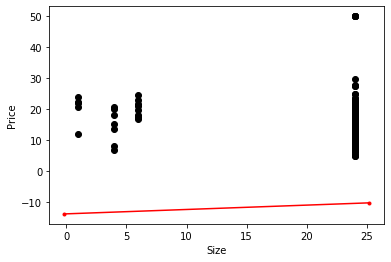

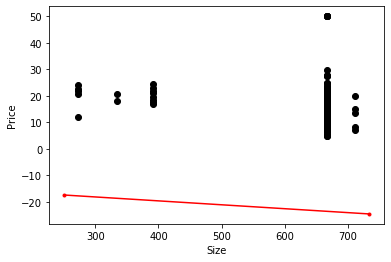

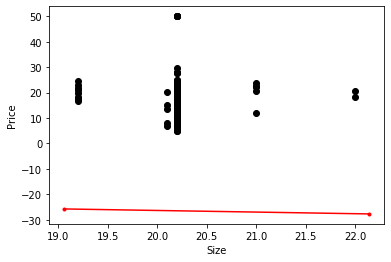

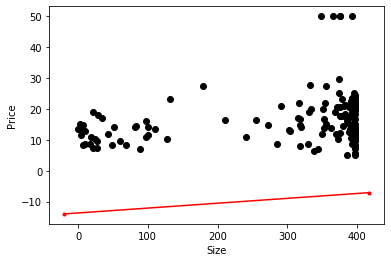

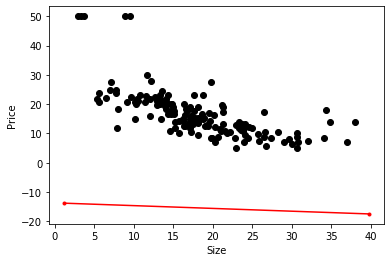

In [26]:
for i in range(0,13):
    plt.plot(X_test[:,i], Y_test, 'o', color='black');
    intercept = regr.intercept_
    slope = regr.coef_[i]
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r.-')
    plt.xlabel("Size")
    plt.ylabel("Price")
    plt.show()